Daten importieren aus CSV
------
!Pfad anpassen!

In [24]:
import pandas as pd

data = pd.read_csv('Documents/2 - Entwicklung/5 - Data Science/Digethic/DS Session 2/Bilddatensatz.csv', ',')

In [25]:
data

,Bild,Hut,Brille,Mund,Verkauft
0,1,1,1,0,1
1,2,0,0,0,0
2,3,0,0,1,1
3,4,1,0,0,0
4,5,0,1,1,0
5,6,1,0,1,1
6,7,1,0,1,1
7,8,1,1,0,1
8,9,1,0,1,1
9,10,0,1,0,0


In [26]:
data[14:]

,Bild,Hut,Brille,Mund,Verkauft
14,15,0,0,0,1


Datensatz vorbereiten und splitten
-----

In [27]:
X = data.drop(["Bild","Verkauft"],axis=1)

In [28]:
print(X)

    Hut  Brille  Mund
0     1       1     0
1     0       0     0
2     0       0     1
3     1       0     0
4     0       1     1
5     1       0     1
6     1       0     1
7     1       1     0
8     1       0     1
9     0       1     0
10    0       0     1
11    0       1     0
12    1       0     1
13    1       0     0
14    0       0     0


In [29]:
y = data["Verkauft"]

In [30]:
print(y)

0     1
1     0
2     1
3     0
4     0
5     1
6     1
7     1
8     1
9     0
10    1
11    0
12    1
13    0
14    1
Name: Verkauft, dtype: int64


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)


In [50]:
X_train = X.drop([10,11,12,13,14])
y_train = y.drop([10,11,12,13,14])
X_test = X.drop([0,1,2,3,4,5,6,7,8,9])
y_test = y.drop([0,1,2,3,4,5,6,7,8,9])

In [51]:
#print('Y Test: {}'.format(y_test.shape))
print(X_test)

    Hut  Brille  Mund
10    0       0     1
11    0       1     0
12    1       0     1
13    1       0     0
14    0       0     0


Decision Tree initialisieren und darstellen
------

In [61]:
from sklearn.tree import DecisionTreeClassifier

entscheidungsbaum = DecisionTreeClassifier(max_depth=3, random_state=0, criterion="entropy")
entscheidungsbaum.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=24, random_state=0)

In [62]:
score = entscheidungsbaum.score(X_test,y_test)
print('Decision Tree scores with {}% accuracy'.format(score*100))

Decision Tree scores with 80.0% accuracy


[Text(167.40000000000003, 190.26, 'X[0] <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [4, 6]'),
 Text(66.96000000000001, 135.9, 'X[2] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(33.480000000000004, 81.53999999999999, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(100.44000000000001, 81.53999999999999, 'X[1] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(66.96000000000001, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(133.92000000000002, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 135.9, 'X[2] <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(234.36, 81.53999999999999, 'X[1] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(200.88000000000002, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 27.180000000000007, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(301.32000000000005, 81.53999999999999, 'entrop

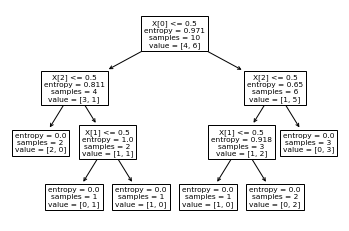

In [63]:
from sklearn import tree
tree.plot_tree(entscheidungsbaum) 

Random Forest
----

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [20]:
score = rf.score(X_test,y_test)
print('Random Forest scores with {}% accuracy'.format(score*100))

Random Forest scores with 80.0% accuracy
